# Convolutional Neural Networks

Any gray scale image is interpreted by a computer as an array. A grid of values where each grid cell is a pixel. for example mnist provides a image of 28x28. 

### Data Normalization

Data normalization is an important pre-processing step. It ensures that each input (each pixel value, in this case) comes from a standard distribution. That is, the range of pixel values in one input image are the same as the range in another image. This standardization makes our model train and reach a minimum error, faster!

Data normalization is typically done by subtracting the mean (the average of all pixel values) from each pixel, and then dividing the result by the standard deviation of all the pixel values. Sometimes you'll see an approximation here, where we use a mean and standard deviation of 0.5 to center the pixel values.

The distribution of such data should resemble a Gaussian function centered at zero. For image inputs we need the pixel numbers to be positive, so we often choose to scale the data in a normalized range [0,1].

We want to normalize each pixel value, for example in grey scale images our pixels are 0 - 255, so we want to divide them by 255. and this is important because our network relies on gradient calculations. Normalizing the pixel values helps these gradient calculations stay consistent and not get so large that they prevent a network from training. 

### MLPs

They require flattened images. So after converting our matrix into a vector, they can be fed into the input layer of an MLP

**Class Scores** Indicate how sure the network is that a given input is of a specific class. They are often represented as a vector of values or even as a bar graph indicating the relative strengths of the scores. 

### Loss & Optimization
We measure any mistakes that it makes using a loss function, whose job is to measure the difference between the predicted and true class labels. Then using backpropagation we can compute the gradient of the loss with respect to the models' weights. This way we quantify how bad a particular weight is, and find out which weights in the network are responsible for any errors. Finally, using that calculation, we can choose an optimization function like *gradient descent* to give us a way to calculate a better weight value. 

Softmax function is a good function to use at the end to turn your logits into a probability of class scores. 

So our goal is to update the weights of the network in response to the mistakes it makes so that next time it sees the input image, it will predict the most likely label. We need to define some measure of exactly how far off the model currently is from perfection (ground truth). 

Calculate the categorical cross-entropy loss

loss = lower when the prediction and label agree, and higher when the prediction and label disagree.

So a loss function and backpropagation give us a way to quantify how bad a particular network weight is, based on how close a predicted and the true class label are from one another. Next, we need a way to calculate a better weight value - so we can think of the error as a mountain, where we want to descend to the lowest value. This is the role of an optimizer, the standard mthod for minimizing the loss and optimizing for the best weight values is called 'gradient descent'. We have already seen a number of ways to perform gradient descent and each method has a corresponding optimizer. 

### Model Validation

So far we have seen how our model performs based on how the loss changes over each epoch. But the exact number of how many epochs to train for is sometimes not a given. How many epochs should we train for so that our model is accurate but its not overfitting the training data?

One method thats used commonly involves breaking the dataset into three sets called training validation and test sets. And each is treated separately by the model. The model looks only at the training set when it's actively training and deciding how to modify its weights. After every training epoch, we check how the model is doing by looking at the training loss and the loss on the validation set. But its important to know that the model does not use any part of the validation set for the back propagation step. We use the training set to find all the patterns we can, and to update and determine the weights of our model. 

The validation set only tells us if that model is doing well on the validation set. And in this way it gives us an idea of how well the model generalizes to a set of that that is separate from the training set. The idea is, since the model doesn't use the validation set for deciding its weights, that it can tell us if we're overfitting the training set of data. Finally the test set of data is saved for checking the accuracy of the trained model. 

For example let's say we see after epoch 200 that our validation loss is actually beginning to increase, because its not generalizing well enough to also perform well on the validation set. So if we see this divide and how the training and validation losses decrease, you'll want to stop changing the weights of the network around the epoch we see the increase beginning / or ignore or throw away the weights from later epochs where there's evidence of overfitting. This can also be useful if we have multiple architectures to choose from. Even though the model doesn't use the validation set to update its weights, our model selection process is based on how the model performs on both the training and validation sets. So, in the end, the model is biased in favor of the validation set. Thus, we need a separate test set of data to truly see how our selected model generalizes and performs when given data it really has not seen before. 

### Validation Loss

We Create a validation set to:
1. Measure how well a model generalizes during training
2. Tell us when to stop training a model; when the validation loss stops decreasing (and especially when the validation loss starts increasing and the training loss is still decreasing)

### Image classification steps

1. **Visualize Data**: Load and visualize the data we are working with
2. **Pre-Process**: the data by normalizing it and converting it into a tensor, so that its prepped for futher processing by the layers of a neural network.
3. **Define a model**: Do your research, has anyone approached this? Use this to decide on a model architecture and define it. 
4. **Train your Model**: Decide on loss and optimization functions and proceed with training your model. 
5. **Save the Best Model**: Choose to use a validation dataset to select and save the best model during training. 
6. **Test Your Model**: on previously unseen data. 

## MLPs vs CNNs

So far, we've investigated how to train an MLP to classify handwritten digits in the MNIST dataset, the best algorithms are the ones with the least test error are the approaches that use Convolutional Neural Networks or CNNs. For most image classification tasks, they do not even compare. 

For MLPs we need to input out data as a simple vector of numbers with no special structure. It has no knowledge of the fact that these numbers were originally spatially arranged in a grid. 

CNNs, in contrast, are built for the exact purpose of working with or elucidating the patterns in multidimensional data. Unlike MLPs, CNNs understand the fact that image pixels that are closer in proximity to each other are model heavily related than pixels that are far apart. 

### Local Connectivity

MPLs (Issues)
- First, use a lot of parameters. **Only uses fully connected layers**
- We get rid of all the 2D Information contained in an image when we flatten its matrix to a vector. The spatial information or knowledge of where the pixels are located in reference to each other is relevant to understanding the image and could aid significantly towards elucidating the patterns contained in the pixel values. 

This suggests that we need an entirely new way of processing image input, where the 2D information is not entirely lost. 

CNNs
- Also use sparsely connected layers - it will address the problems by user layers that are more sparsely connected, where the connections between layers are informed by the 2D structure of the image matrix. 
- Accept our matrix as input 

In a MLP does every hidden node need to be connected to every pixel in the original image? Perhaps not.

Instead we use a regional breakdown and the assignment of small local groups of pixels to different hidden nodes, every hidden node finds patterns in only one of the four regions in the image. Then, each hidden node still reports to the output layer where the output layer combines the findings for the discovered patterns learned separately in each region. This so called locally connected layer uses far fewer parameters than a densely connected layer. Its less prone to overfitting and truly understands how to tease out the patterns contained in image data. We can rearrange each of these vectors as a matrix, where now the relationships between the nodes in each layer are more obvious. We can expand the number of patterns that we're able to detect while still making use of the 2D structure to selectively and conservatively add weights to the model by introducing more hidden nodes. Where each is still confined to analyzing a single small region within the image. 

We can now have two collections of hidden nodes where each collection contains nodes responsible for examining a different region of the image. It will be useful for each of the nodes within a collection share a common group of weights. The idea being that different regions within the image can share the same kind of information. In other words every pattern thats relevant towards understanding the image could appear anywhere within the image. 

### Filters and the Convolutional Layer 

CNNs can remember spatial information. The neural networks that we've seen so far only lookat individual inputs. But CNNs can look at images as a whole or in patches and analyze groups of pixels at a time. The key to preserving the spatial information is something called the convolutional layer. A convolutional layer applies a series of different image filters also known as convolutional kernels to an input image. the resulting filtered images have different appearances, the filters may have extracted features like the edges of objects in that image, or the colors that distinguish the different classes of images. 

### Filters 

Spatial patterns in an image, shape or color. 

Shape can be thought of as patterns of intensity in an image. Intensity is a measure of light and dark, similar to brightness, and we can use this knowledge to detect the shape of object in an image. You can often identify the edges of an object by looking at abrupt changes in intensity. 

### Frequency in images

Frequency in images is a **rate of change**., Images change in space, and a high frequency image is one where the intensity changes a lot. And the level of brightness changes quickly from one pixel to the next. A low frequency image may be one that is relatively uniform in brightness or changes very slowly. 

Most images have both high-frequency and low-frequency components. 

### High pass filters

Filters are used to filter out unwanted or irrelevant information in an image or to amplify features like object boundaries or other distinguishing traits. **High pass filters** are used to make an image appear _sharper_ and enhance high-frequency parts of an image. Where parts of the image neighboring pixels rapidly change like from very dark to very light pixels. 

This will emphasize edges, which are areas in an image whre the intensity changes very quickly and these edges often indicate object boundaries. 

Filters here, are in the form of matrices, often called **convolutional kernels** which are just grids of numbers that modify an image. 

For example, edge dectection is a 3x3 kernel whose elements all sum to zero. 

$$\begin{matrix}
0 & -1 & 0 \\
-1 & 4 & {-1} \\
0 & -1 & 0
\end{matrix}$$

Its important they sum to zero because this filter is computing the difference or change between neighboring pixels. To apply this input image $F(x,y)$ is convolved with this kernel, with $k$ - the kernel. This is called kernel convolution and convolution is represented by an asterisk $*$. $K * F(x, y) = $ output image. Kernel convolution is an important problem in computer vision applications and its the basis for convolutional neural networks. So from changing the kernel numbers we can create many different effects from edge detection to blurring an image. 

So what we do is multiply each value in the kernel to their corresponding pixel value in the image, and then the new values are then added up to provide us the new pixel value. The multipliers in our kernel are often called weights because they determine how important or how weighty a pixel is in forming a new output image. In this case, for edge detection, the center pixel is the most important followed by its closest pixels on the top, bottom, left and right. Which are negative weights which increase the contrast in the image. The corners are the farthest away from the center pixel and in this example, we do not give them any weight (they are zero). So the weighted sum becomes the value at the corresponding pixel at the same location xy in the output image. 

The kernel cannot be nicely laid over 3x3 pixel values everywhere. 
So what do we do in the corners? Below is from Udacity.

**Edge Handling**
Kernel convolution relies on centering a pixel and looking at it's surrounding neighbors. So, what do you do if there are no surrounding pixels like on an image corner or edge? Well, there are a number of ways to process the edges, which are listed below. It’s most common to use padding, cropping, or extension. In extension, the border pixels of an image are copied and extended far enough to result in a filtered image of the same size as the original image.

**Extend** The nearest border pixels are conceptually extended as far as necessary to provide values for the convolution. Corner pixels are extended in 90° wedges. Other edge pixels are extended in lines.

**Padding** The image is padded with a border of 0's, black pixels.

**Crop** Any pixel in the output image which would require values from beyond the edge is skipped. This method can result in the output image being slightly smaller, with the edges having been cropped.

#### Quiz

The kernel which would be best for finding and enhancing horizontal edges and lines in an image, would be 

$$\begin{matrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1
\end{matrix}$$

Notice that the commonality on the first row and third row, while the middle row is empty. 

### The importance of filters

CNNs are a kind of deep learning model that can learn to do things like image classification and object recognition. They keep track of spatial information and learn to extract features like the edges of objects in something called a **convolution layer**. 

The convolutional layer is produced by applying a series of many different image filters, also known as convolutional kernels, to an input image. 

![cnnlayer](..data\convolutional_layer.png)

### Learning
We have been setting the values of filter weights explicitly, but NNs will actually learn the best filter weights as they train on a set of image data. 

### Convolutional Layers

Each Filter we will consider as either a feature map or as an activation map. After visualizing the feature maps we can see that they look like filtered images. So a filtered image after a feature map has been convolved on the original image outputs a much simpler image with less information. Lighter values in the feature map mean that the pattern in the filter was detected in the image. Edges in images appear as a line of lighter pixels next to a line of darker pixels. 

Grayscale images are interpreted by a computer as a 2D array, with height and width. 

Color images are interpreted by the computer as a 3D array with heigh, width, and depth. 

With the case of RGB images, the depth is 3. And the 3D array can be best conceptualized as a stack of three two-dimensional matrices, where we have matrices corresponding to the red, green and blue channels of the image. **So how do we perform a convolution on a color image?**
As with grayscale images we still move a filter horizontally and vertically across the image. Only now the filter is itself three dimensional to have a value for each color channel at each horizontal and vertical location in the image array. Just as we think of the color image as a stack of three two-dimensional matrices, you can also think of the filter as a stack o three two-dimensional matrices. Both the color image and the filter have red, green and blue channels. Now to obtain the values of the nodes in the feature map corresponding to this filter, we do the same thing as we did before. Only now, our sum is over three times as many terms. With ReLU activation after the summation. 

Now, if we wanted to picture the case of a color image with multiple filters, instead of having a single 3D array, which corresponds to one filter, we would define multiple 3D arrays each defining a filter. 

We can think about each of the feature maps in a convolutional layer along the same lines as an image channel and stack them to get a 3D array. Then, we can use this 3D array as input to still another convolutional layer to discover patterns within the patterns that we discovered in the first convolutional layer. We can then do this again to discover patterns within patterns within patterns. 

Convolutional layers are not too different then Dense Layers (we saw previously), Dense layers are fully connected meaning that the nodes are connected to every node in the previous layer. Whereas, convolutional layers are locally connected where their nodes are connected to only a small subset of the previous layers' nodes. Convolutional layers also had this added perimeter sharing. But in both cases with convolutional and dense layers, inference works the same way. Both have weights and biases that are initially randomly generated. So in the case of CNNs where the weights take the form of convolutional filters, those filters are randomly generated and so are the patterns that they're initially designed to detect. As with MLPs, when we construct to CNN we will always specify a loss function. In the case of multiclass classification, this will be categorical cross-entropy loss. Then as we train the model through back propagation, the filters are updated at each epoch to take on values that minimize the loss function. In other words, the CNN determines what kind of patterns it needs to detect based on the loss function. 

So for CNNs we won't specify the values of the filters or tell the CNN what kind of patterns it needs to detect. These will be learned from the data. 

http://setosa.io/ev/image-kernels/

### Stride and Padding

We have seen you can control the behavior of a Convolutional Layer by specifying the number of filters and size of each filter, for instance. To increase the number of nodes in a convolutional layer, you could increase the number of filters. To increase the size of the detected patterns, you could increase the size of your filter. 

One of these hyperparameters is referred to as the side of the convolution. the **stride** is just the amount by which the filter slides over the image. A stride of 1 means we move the convolution window horizontally and vertically across the image one pixel at a time. A stride of 1 makes the convolutional layer roughly the same width and height as the input image. If we make the stride 2, the convolutional layer is about half the width and height of the image. Roughly because it depends on what you do at the edge of your image. To see how the treatment of the edges will matter, consider our toy example of a 5x5 gray scale image. 
**What do we do if the filter extends outside the image?**
Do we still want to keep the corresponding convolutional node? How do we deal with these nodes where the filter extended outside the image? One option is to get rid of them, if we choose this option than its possible our convolutional layer has no information about some regions of the image. Another option would be to plan ahead by padding the image with zeros to give the filter more space to move. Now we get contributions from every region in the image. 

### Pooling Layers

We're now ready to introduce to the second and final type of layer that we'll need to introduce before building our convolutional neural networks. These so-called pooling layers often take convolutional layers as input. 

Recall a convolutional layer is a stack of feature maps where we have one feature map for each filter. A complicated dataset with many different object categories will require a large number of filters, many different object categories will require a large number of filters, each responsible for finding a pattern in the image. more filters means a bigger stack, which means that the dimensionality of our convolutional layers can get quire large. Higher dimensionality means, we'll need to use more parameters, which can lead to over-fitting. Thus, we need a method for reducing this dimensionality. This is the role of pooling layers within a convolutional neural network. 

We'll focus on two different types of pooling layers. The first type is a **max pooling layer**, max pooling layers will take a stack of feature maps as input. As with convolutional layers, we define a window size and stride. To construct the max pooling layer we'll work with each feature map separately. Let's begin with the first feature map, we start with our window in the top left corner of the image. The value of the corresponding node in the max pooling layer is calculating by just taking the _maximum of the pixels contained in the window_. If we continue this process and do it for all of our feature maps, the output is a stack with the same number of feature maps, but each feature map has been reduced in width and height. In this case since the stride is 2, the widht and height are half of that of the previous convolutional layer. 

The other type of pooling is to use **average pooling**, which chooses to average pixel values in a given window size so in a 2x2 window, this operation will see 4 pixel values and return a single average of those 4. This is typically not used for image classification problems because maxpooling is better at noticing the most important details about edges and other features in an image, but you may see this used in application for which _smoothing_ an image is preferable. 

### Capsule Networks

Its important to note that pooling operations do throw away some image information. That is, they discard pixel information in order to get a smaller, feature-level representation of an image. This works quite well in tasks like image classification, but it can cause some issues. 

In the case of facial recognition, when you think of how you identify a face, you might think about noticing features, two eyes, a nose and a mouth, for example. And those pieces, together, form a complete face. A typical CNN that is trained to do facial recognition, should also learn to identify these features. Only by distilling an image into a feature-level representation, you might get a weird result. So there has been research into classification methods that do not discard spatial information (as in the pooling layers) and instead learn the spatial relationships between parts (like between eyes, nose and mouth). 
One method for learning spatial relationships between parts, is the **capsule network**. 

Capsule networks provide a way to detect parts of objects in an image and represent spatial relationships between those parts. This means a capsule networks are able to recognize the same object, like a face, in a variety of different poses and with the typical number of features (eyes, nose, mouth) even if they have not seen that pose in training data. Capsule networks are made of parent and child nodes that build up a complete picture of an object. 

**What are capsules?**
Capsules are essentially a collection of nodes, each of which contains information about a specific part; part properties like width, orientation, color and so on. The important thing to note is that each capsule **outputs a vector** with some magnitude and orientation. 

- Magnitude (m) = the probability that a part exists, a value between 0 and 1. 

- Orientation (theta) = the state of the part properties. 

These output vectors allow us to do some powerful routing math to build up a parse tree that recognizes whole objects as comprised of several, smaller parts!

The magnitude is a special part property that should stay very high even when an object is in a different orientation, as shown below. 

https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5bfdca4f_dynamic-routing/dynamic-routing.pdf

### Increasing Depth

Convolutional layers detect regional patterns in an image using a series of image filters. We've seen how typically a ReLU activation function is applied to the output of these filters to standardize their output values. Then, we learned about max pooling layers, which appear after convolutional layers to reduce the dimensionality of our input arrays. 

**Data Processing**
Similar to MLPs, the CNNs we discuss will require a fixed size input. 
so we have to pick an image size and resize all of images to that same size before doing anything else. 

This is another data preprocessing step alongside normalization and conversion to a tensor datatype. 

Its also very popular to resize each image to a square with the spatial dimensions equal to a power of two, or else a number that's divisible by a large power of two. 

The input array will always be much taller and wider than it is deep. Such that RGB images have a depth of 3, while we can think of grayscale images also being three dimensional with a depth of 1. 

Our CNN architecture will be designed with the goal of taking that array and gradually making it much deeper than it is tall or wide. Convolutional layers will be used to make the array deeper as it passes through the network, and max pooling layers will be used to decrease the XY dimensions. As the network gets deeper its actually extracting more and more complex patterns and features that help identify the content and the objects in an image, and it's actually discarding some spatial information about features like a smooth background and so on that do not help identify the image. 

## Why do we need padding?

When we create a convolutional layer, we move a square filter around an image, using a center-pixel as an anchor. So, this kernel cannot perfectly overlay the edges/corners of images. The nice feature of padding is that it will allow us to control the spatial size of the output volumes (most commonly as we will soon see we will use it to exactly preserve the spatial size of the input volume so the input and output width and height are the same). 

The most common methods of padding are padding an image with all 0-pixels (**zero padding**) or padding with the nearest pixel value. 
http://cs231n.github.io/convolutional-networks/#conv

## Quix: 

- **How might you define a Maxpooling layer, such that it down-samples an input by a factor of 4? **

```python
>>> nn.MaxPool2d(2, 4)
>>> nn.MaxPool2d(4, 4)
```

The _best_ choice would be to use a kernel and stride of 4, so that the maxpooling function sees every input pixel once, but **any layer** with a stride of 4 will down-sample an input by that factor. 

- **If you want to define a convolutional layer that is the same x-y size as an input array, what padding should you have for a** `kernel_size` **of 7? All other parameters are left as their default values.**

```python
>>> padding=3

```

If you overlay a 7x7 kernel so that its center-pixel is at the right edge of an image, you will have 3 kernel columns that do not overlay anything! So, that's how big your padding needs to be. 

## PyTorch Layer Doc

### Convolutional Layers

We typically define a convolutional layer in PyTorch using `nn.Conv2d` with the following parameters specified. 

```python
>>> nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0)
```

- `in_channels` refers to the depth of an input, for grayscale image this depth = 1
- `out_channels` refers to the desired depth of the output, or the number of filtered images you want to get as output
- `kernel_size` is the size of your convolutional kernel (most commonly 3 for a 3x3 kernel)
- `stride` and `padding` have default values, but should be set depending on how large you want your output to be in the spatial dimensions x, y

### Pooling Layers
Maxpooling layers commonly come after convolutional layers to shrink the x-y dimensions of an input.

https://classroom.udacity.com/nanodegrees/nd101/parts/2e8d3b5d-aa70-4376-946f-0cdc37127d7d/modules/19a75d10-547d-4497-ae68-609ca1a235fc/lessons/807590ea-abd5-4581-b91d-9eede9a0aad2/concepts/62a4771f-ea82-44a4-afac-dd6bacda27bc

### Shape of a Convolutional Layer

The shape of a conv layer depends on the supplied values of the kernel_size, input_shape, padding and stride.
- K = the number of filters in the conv layer
- F = the height and width of the conv filters
- S = the stride of the convolution
- P = the padding
- W_in = the width/height (square) of the previous layer 

To calculate the output shape of a convolutional layer. 

The **depth** of the convolutional layer will always equal the number of filters K.

$$ shape = [ (Win - F + 2P)/S] + 1 $$


## Quiz 

For the following quiz, consider an input image that is `130x130 (x,y) and 3` in depth RGB. Say this image goes through the following layers in order: 

```
nn.Conv2d(3, 10, 3)
nn.MaxPool(4, 4)
nn.Conv2d(10, 20, 5, padding=2)
nn.MaxPool2d(2, 2)
```

### Question 1:

- After going through all four of these layers in sequence, what is the depth of the final output?

```python
>>> 20
```
- What is the x-y size of the output of the final maxpooling layer? Careful to look at how the 130x130 image passes through (and shrinks) as it moved through each convolutional and pooling layer.

```python
>>> 16
```

- How many parameters, total, will be left after an image passes through all four of the above layers in sequence?

```python
>>> 16*16*20
```

## Image Augmentation

When we design an algorithm to classify objects in images, we have to deal with a lot of irrelevant information. We really only want our algorithm to determine if an object is present in the image or not. The size, the angle, or if we move the object to the left or right does not matter (remember its a computer thats going to interpret this and this doesn't matter to a computer). We can say that we want our algorithm to lean an invariant representation of an image. We don't want our model to change its prediction based on the size of the object. This is called **scale invariance** Likewise, we don't want the angle of the object to matter this is called **rotation invariance**, if we shift the image to the left or right, the object is still in the image, this is called **translation invariance**.  
CNN's do have some built-in **translation invariance**, to see this we need to recall how we calculate max-pooling layers. Remember at each window location, we took the maximum of the pixels contained in the window. This maximum value can occur anywhere within the window. The value of the max-pooling node would be the same if we translated the image a little to the left, to the right, up, down as log as the maximum value stays within the window. The effect of applying many max-pooling layers in a sequence each one following a convolutional layer, is that we could translate the object quite far to the left, to the top of the image, to the bottom of the image, and still our network will be able to make sense of it all. This is a **non-trivial** problem. (The computer only sees a matrix of pixels) Transforming an object's scale, rotation, or position in the image has a huge effect on the pixel values. Theres a convenient way to making our algorithms more statistically invariant, but it will feel a little bit like cheating. The idea is this, if you want your CNN to be rotation invariant, well, then you can just add some images to your training set created by doing random rotations on your training images. if you want more translation invariance you can also just add new images created by doing random translations of your training images. When we do this we say that we have expanding the training set by augmenting the data. Data augmentation will also help us to avoid overfitting. This is because the model is seeing many new images, Thus it should be better at generalizing and we should get better performance on the test dataset. 

```python
transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(), #random flip and rotate
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    trnasforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

```

That's all you need to do to give your images some geometric variation. 

## Visualizing CNNs

We have seen that CNNs have sometimes achieve superhuman performance in object classification tasks. We don't really have an understanding of how these CNNs discover patterns in raw image pixels. If you've already trained your own CNNs youve noticed that some architectures work while some just don't. 

As one technique for digging deeper into understanding how a CNN is working. There are many implementations of this online. You can start with an image containing random noise and then gradually amend the pixels, and each step changing them to values that make the filter more highly activated. When you do this, you will notice that the first three layers are pretty general 

https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html



# Common CNN Libraries in Python

## OpenCV

Is a computer vision and machine learning software library that includes many common image analysis algorithms that will help us build custom, intelligent computer vision applications. 

/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


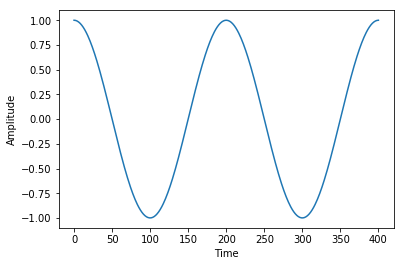

In [1]:
import numpy as np
from matplotlib import pyplot as plt
#setting
k = 2
res = 400
t = np.linspace(0, res, res)
time = np.linspace(0, 1, res)
hz = np.exp(-2j * np.pi * k * t / len(t))
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.plot(t, hz)
plt.show()